# # [Amet Vikram]
# # ECE 539 : Term Project
# # Dataset 1 : Mice Protein Expression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data_Cortex_Nuclear.csv")

In [3]:
display(df.head())

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

## Data Analysis and Exploration

<h4>Premilinary Analysis</h4>

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

<p>Now from the above analysis we can make the following points :-</p>
<ul>
<li>We can observe that columns from index <strong>1 to 77</strong> are all <strong>"float64"</strong> that is <strong>numerical type</strong> and columns from index <strong>78 to 81</strong> are all <strong>"object"</strong> that is <strong>non-numerical or categorical type.</strong></li>
<li>We will seperate these columns based on the numerical and categorical nature into two seperate lists for further analysis and processing.</li>
<li>We can also drop the first column <strong>(index 0) "MouseID"</strong> as it has no significance in our analysis and prediction.</li>
</ul>

In [4]:
target_class = "class"

features_drop = pd.Index(["MouseID"])

num_cols = df.columns[1:78]
cat_cols = df.columns[78:]

print(num_cols)
print("\n")

print(cat_cols)
print("\n")

print("Features to drop are:-")
print(features_drop)
print("\n")

print("Target Feature:",target_class)

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'],
      dtype='object')


Index(['Genotype', 'Treatment', 'Behavior', 'class'], dtype='object')




<h4>Null value Analysis</h4>

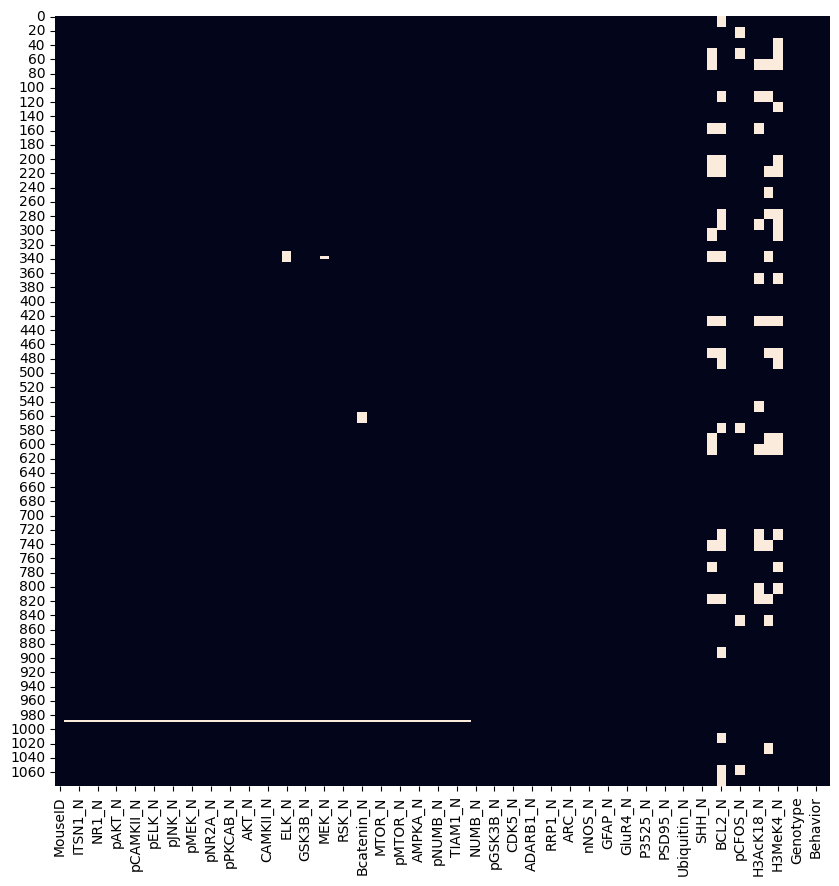

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna(),cbar=False)
plt.show()

In [5]:
samples_large_omissions = []
for i in range(len(df)):
    val = df.loc[i,:].isna().sum()
    if val > len(df.columns)/4 :
        samples_large_omissions.append(i)
        print(i,":",val)
print("Data Samples with more than 25% missing values:",samples_large_omissions)

987 : 43
988 : 43
989 : 43
Data Samples with more than 25% missing values: [987, 988, 989]


In [6]:
features_large_omissions = []
for i,col in enumerate(df.columns):
    val = df.loc[:,col].isna().sum()
    if val > 0.125*len(df) :
        features_large_omissions.append(col)
        print("{}) {} : {}".format(i,col,val))
print("Features with more than 12.5% missing values:",features_large_omissions)

69) BAD_N : 213
70) BCL2_N : 285
74) H3AcK18_N : 180
75) EGR1_N : 210
76) H3MeK4_N : 270
Features with more than 12.5% missing values: ['BAD_N', 'BCL2_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N']


<p>Now from the above analysis and heatmap of the missing values we can make the following points :-</p>
<ul>
<li>Overall the dataset does not have too many missing values.</li>
<li>For&nbsp;3 data samples, there is more than 25% of feature columns data missing, <strong>43 feature columns data out of 82 columns</strong> to be precise.</li>
<li>For 5 features columns, specifically from index <strong>69 to 76</strong>, there are more than 12.5% data samples that does not have information have for these 5 feature columns.</li>
</ul>
<p>With the above points, we can conclude that <strong>Data Imputation</strong>&nbsp;is required and we can use appropriate imputation method to fill the gaps in the data samples mentioned in above points.</p>

<h4>Categorical value Analysis</h4>

In [9]:
for col in cat_cols:
    print(col,":",pd.unique(df[col]))

Genotype : ['Control' 'Ts65Dn']
Treatment : ['Memantine' 'Saline']
Behavior : ['C/S' 'S/C']
class : ['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


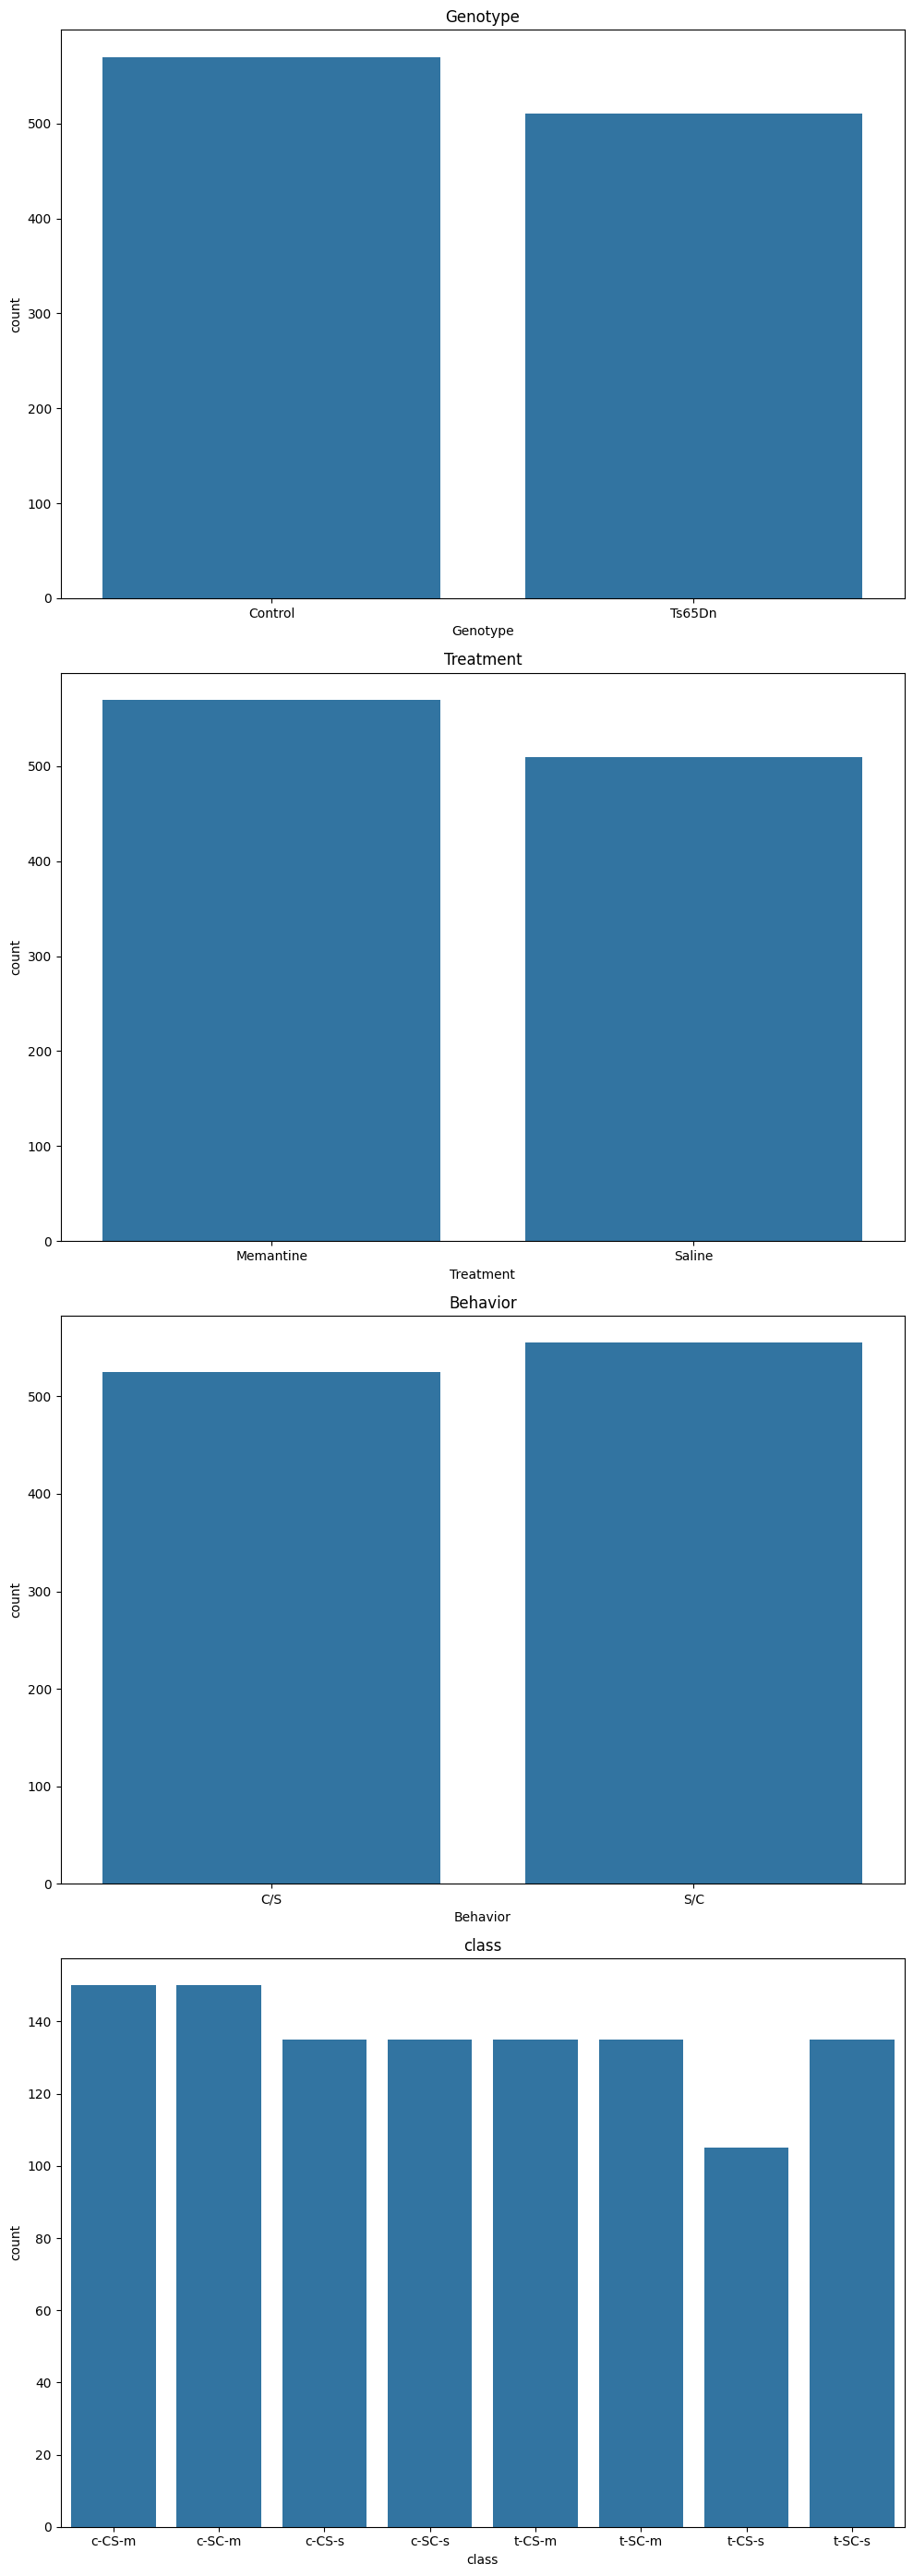

In [10]:
fig, axes = plt.subplots(4, 1, figsize=(10, 4 * 7))

for i,col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i]);
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

<p>Now from the above analysis and bar plots of the categorical values we can make the following points :-</p>
<ul>
<li>Overall for all 3 categorical values -- <strong>Genotype, Treatment, and Behabiour</strong>, we have nearly equal number of data sample for each class</li>
<li>For the <strong>"class"</strong> feature, we have a slight <strong>class imbalance</strong> with respect to <strong>"t-CS-s"</strong> class where we have relatively a smaller set of data samples as compared to other classes.</li>
<li><strong>NOTE:</strong> Upon examining the categorical features, it is clear that the target feature is a combination of categorical feature in the format <strong>Genotype-Behabiour-Treatment</strong>, and so we will use these categorical features as part of our target columns to conduct any analysis and training of the model.</li>
<li>All categorical features have <strong>no inherent order,</strong> and so a <strong>nominal encoding</strong> method can be employed to encode all the categorical variables.</li>
<li>It should be noted while using nominal encoding methods such as <strong>"One hot encoding",&nbsp;</strong>we are essentially increasing the dimension of our data and since the dimension of data is already high enough, we might have to use some kind <strong>"Dimensional reduction method"</strong> to get the best results along with <strong>"One hot encoding". [Refer bibliography]</strong></li>
</ul>
<p>With the above points, we can conclude that there is <strong>no major class imbalance</strong> in the dataset for any categorical value and we have to use <strong>stratified sampling methods</strong> to separate our training and test data and then use appropraite training algorithms to train the data and <strong>transform the&nbsp;categorical&nbsp;variables using nominal encoding method.</strong></p>
<p><strong>Bibliography: <a href="https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor/9447#9447">LabelEncoder vs OHE</a></strong></p>

<h4>Numerical value Analysis</h4>

In [11]:
display(df[num_cols].describe())

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.063236     0.064043     1.343998     0.112812     0.429032  ...   
25%       0.205755     0.164595     2.479834     0.190823     1.203665  ...   
50%       0.231177     0.182302     3.326520     0.210594     1.355846  ...   
75%       0.257261     0.197418     4.481940     0.234595     1.561316  ...   
max       0.539050     0.317066     7.464070     0.306247     6.113347  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 77 columns]

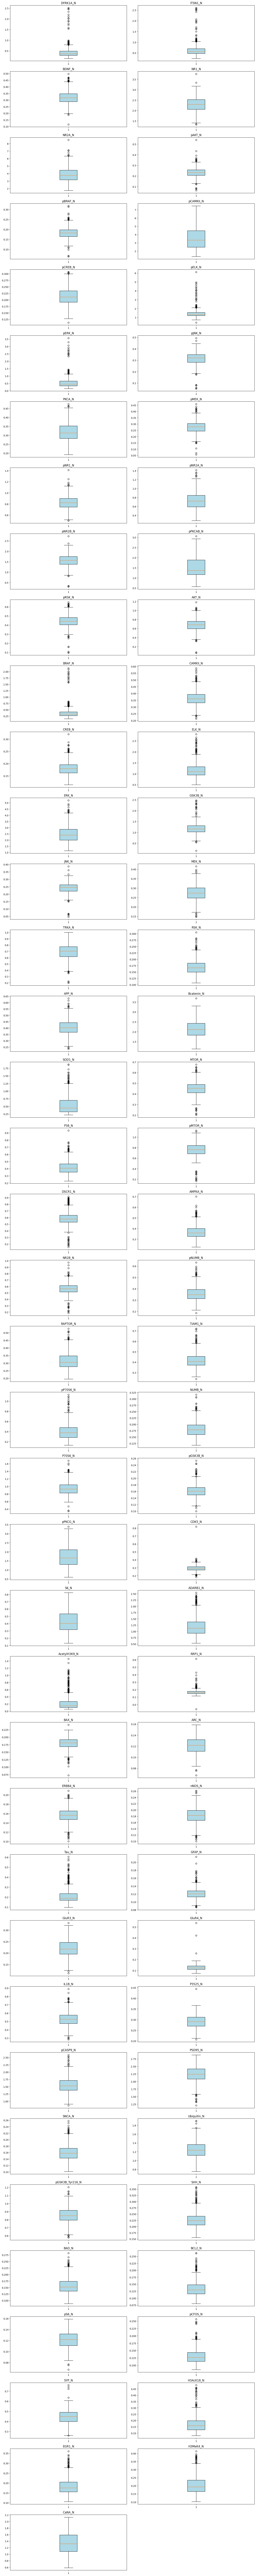

In [49]:
fig, axes = plt.subplots(39, 2, figsize=(15, 15 * 10))
axes = axes.ravel()
for i,col in enumerate(num_cols):
    axes[i].boxplot(df[col].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

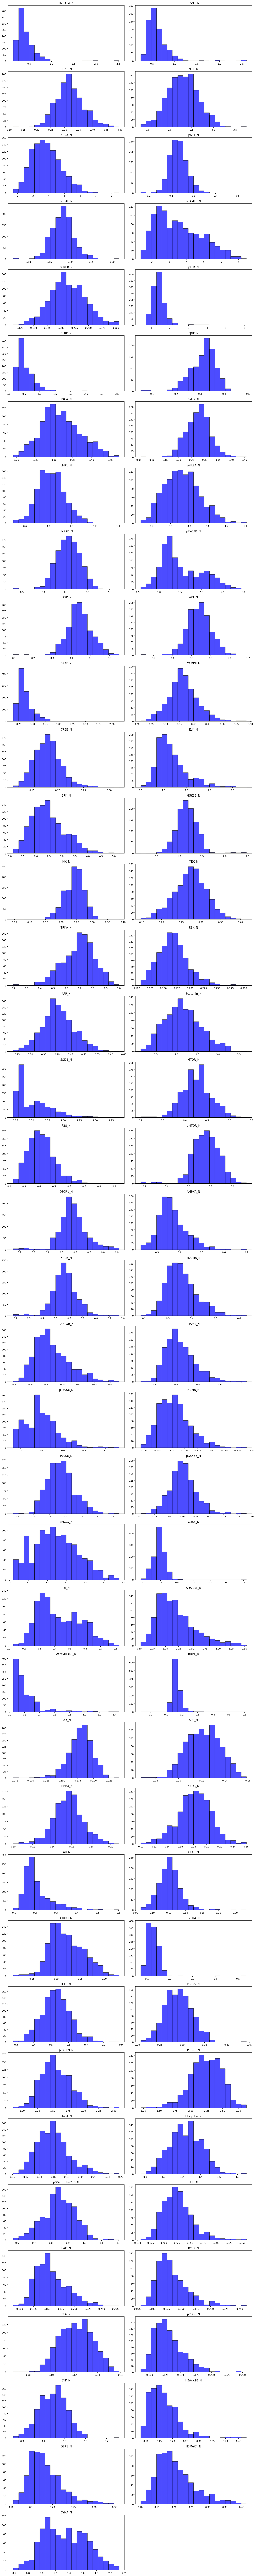

In [48]:
fig, axes = plt.subplots(39, 2, figsize=(15, 15 * 10))
axes = axes.ravel()
for i,col in enumerate(num_cols):
    axes[i].hist(df[col].dropna(), bins=20, color='blue', alpha=0.7, edgecolor='black')
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

count    81764.000000
mean         0.678922
std          0.797354
min         -0.062008
25%          0.197405
50%          0.357520
75%          0.819377
max          8.482553
dtype: float64


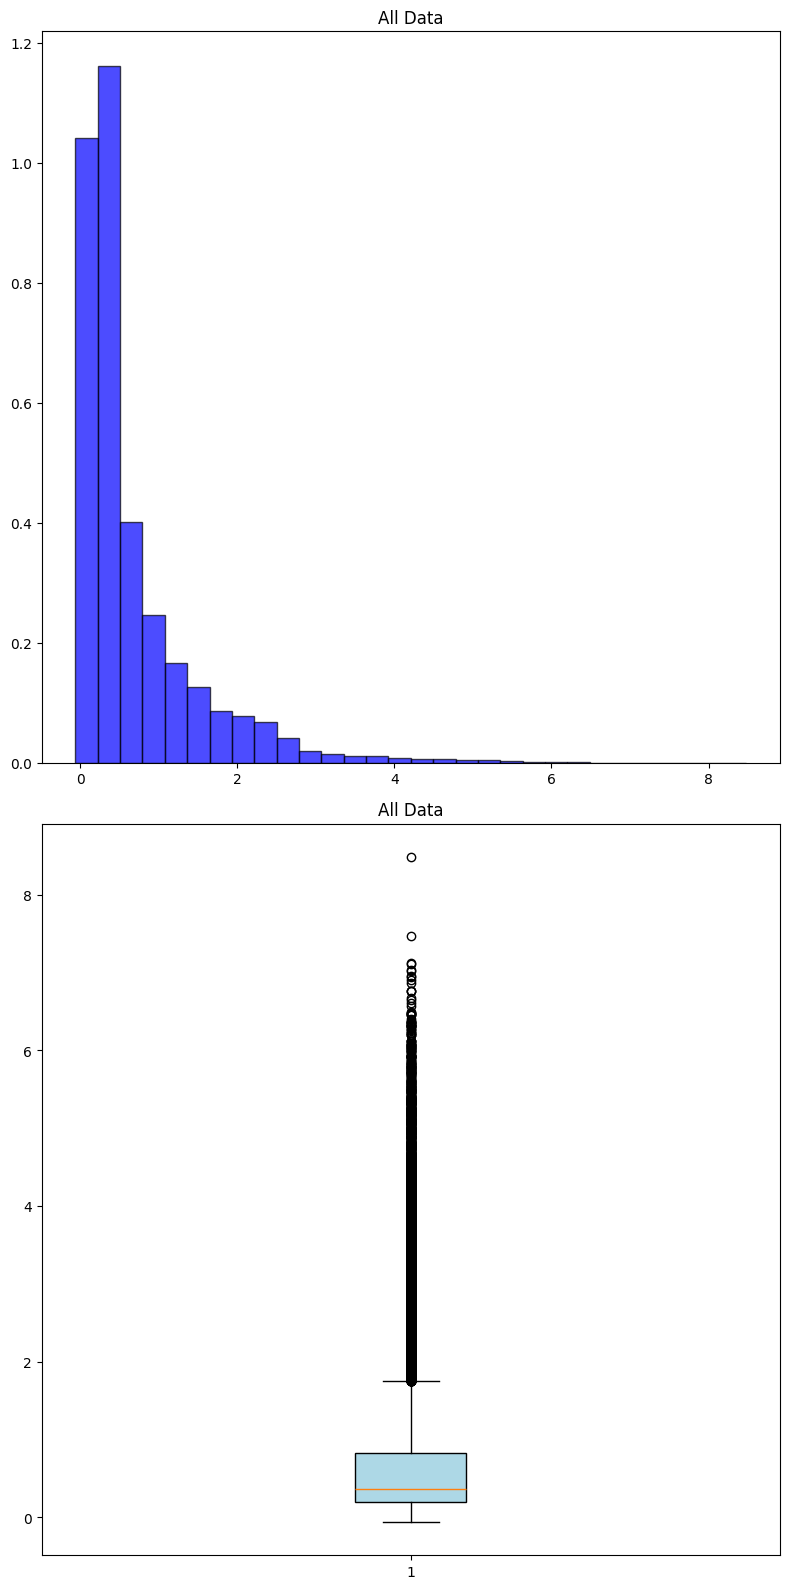

In [87]:
arr = []
for col in num_cols:
    arr += df[col].dropna().to_list()

print(pd.Series(arr).describe())

fig, axes = plt.subplots(2,1,figsize=(1*8, 2*8))

axes[0].hist(arr, bins=30, density=True, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title("All Data")

axes[1].boxplot(arr, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[1].set_title("All Data")

plt.tight_layout()
plt.show()

<p>Now based on the above analysis we can make following points :-</p>
<ul>
<li>From the <strong>"box-plots"</strong>, we can observe that, most of the feature columns have moderate amount of outliers and so wont impact have much impact on classification algorithms. The <strong>"Standard Normalization"</strong> can handle the outliers and will also aid in model training for some algorithms.</li>
<li>Upon examining the histograms for each numerical feature, we can notice one very important observation that for maximum of the feature columns, the histogram exhibit somewhat of <strong>"Gaussian"</strong> nature and thus, <strong>"Gaussian Naive Bayes"</strong> can be employed for this dataset.</li>
<li>Overall, the whole dataset does not exhibit any <strong>"Gaussian"</strong> nature, and so algorithms like <strong>"QDA"</strong> cannot be employed here. Althought the data is somewhat displaying a <strong>"Poisson Distribution"</strong> nature, but there are no classification algorithms that can leverage the poisson process.</li>
</ul>

<h4>Correlation Analysis</h4>

In [76]:
def get_top_abs_correlations(data=df,n=5):
    corr = df[num_cols].corr().abs().unstack()
    pairs_to_drop = set()
    for i in range(len(num_cols)):
        for j in range(0,i+1):
            pairs_to_drop.add((num_cols[i],num_cols[j]))
    corr = corr.drop(labels=pairs_to_drop).sort_values(ascending=False)
    return corr[:n]

print(get_top_abs_correlations(df,30))

ARC_N         pS6_N         1.000000
DYRK1A_N      BRAF_N        0.959578
              ITSN1_N       0.959512
NR1_N         pNR1_N        0.947872
DYRK1A_N      pERK_N        0.945719
pERK_N        BRAF_N        0.926984
ITSN1_N       BRAF_N        0.917608
NR1_N         Bcatenin_N    0.914610
pNR1_N        pNR2B_N       0.906504
ITSN1_N       pERK_N        0.906289
NR1_N         pNR2B_N       0.895077
              NR2A_N        0.873889
pAKT_N        pMEK_N        0.873101
pNR1_N        Bcatenin_N    0.872627
NR2A_N        pNR1_N        0.869717
              Bcatenin_N    0.866680
              pNR2B_N       0.859868
AMPKA_N       TIAM1_N       0.857801
NR1_N         TRKA_N        0.856851
ELK_N         ERK_N         0.856061
MTOR_N        NR2B_N        0.851336
NR2A_N        ERK_N         0.851140
pNR2B_N       Bcatenin_N    0.849255
pJNK_N        pMEK_N        0.844559
pBRAF_N       pMEK_N        0.841829
BCL2_N        EGR1_N        0.841650
ITSN1_N       GSK3B_N       0.838842
E

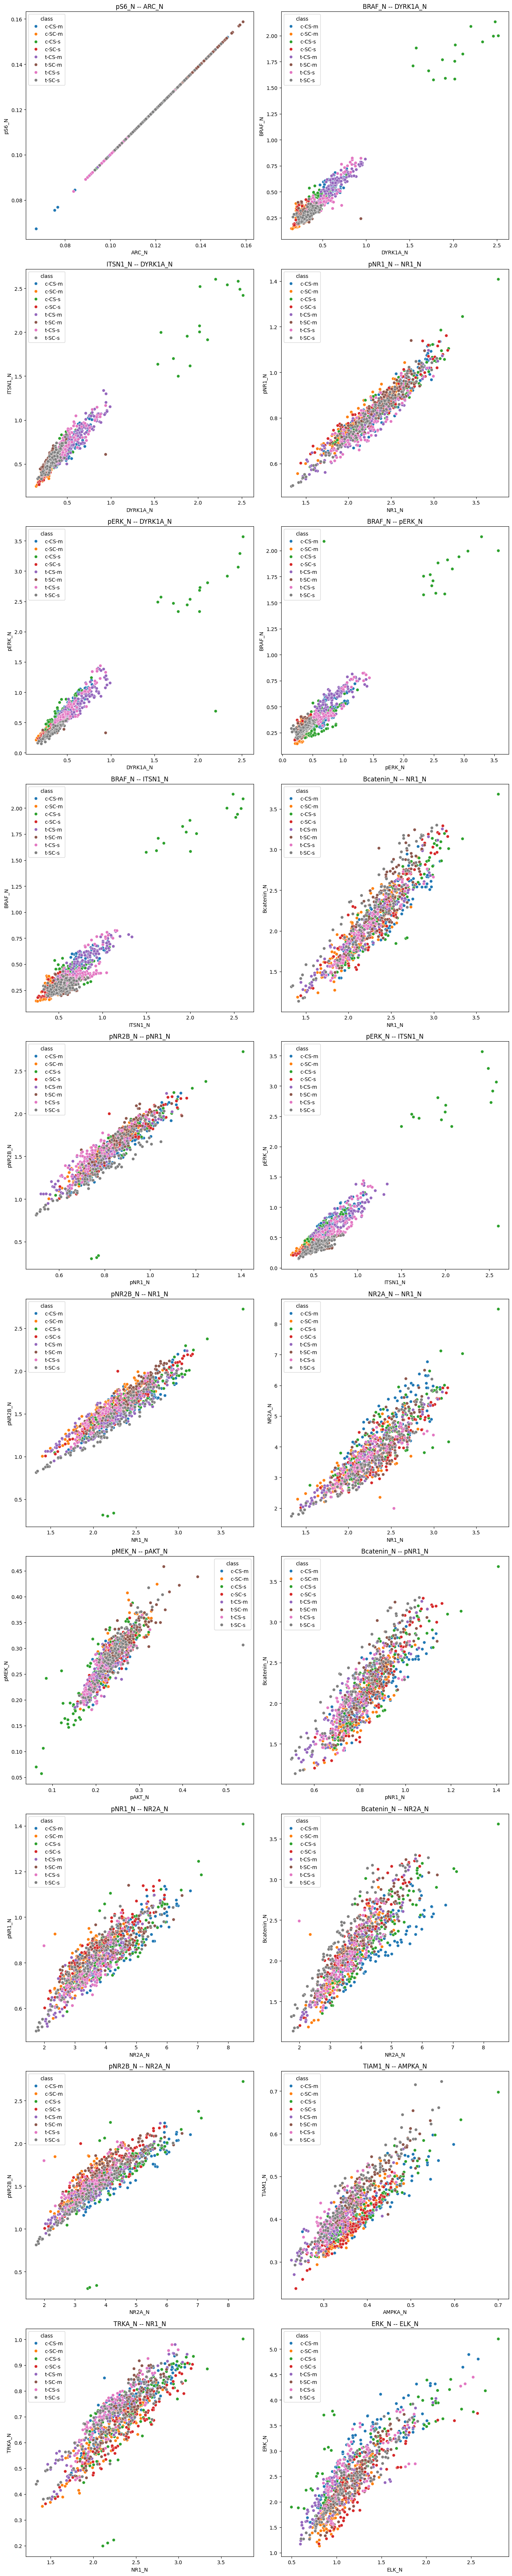

In [74]:
corr = get_top_abs_correlations(df,20)

fig, axes = plt.subplots(10, 2, figsize=(2 * 7, 10 * 7))

axes = axes.ravel()

for i,val in enumerate(corr.index):
    x = val[0]
    y = val[1]
    sns.scatterplot(x=df[x],y=df[y],hue=df[target_class],ax=axes[i]);
    axes[i].set_title(y+" -- "+x)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

count    2926.000000
mean        0.265750
std         0.200183
min         0.000046
25%         0.106323
50%         0.224070
75%         0.381980
max         1.000000
dtype: float64


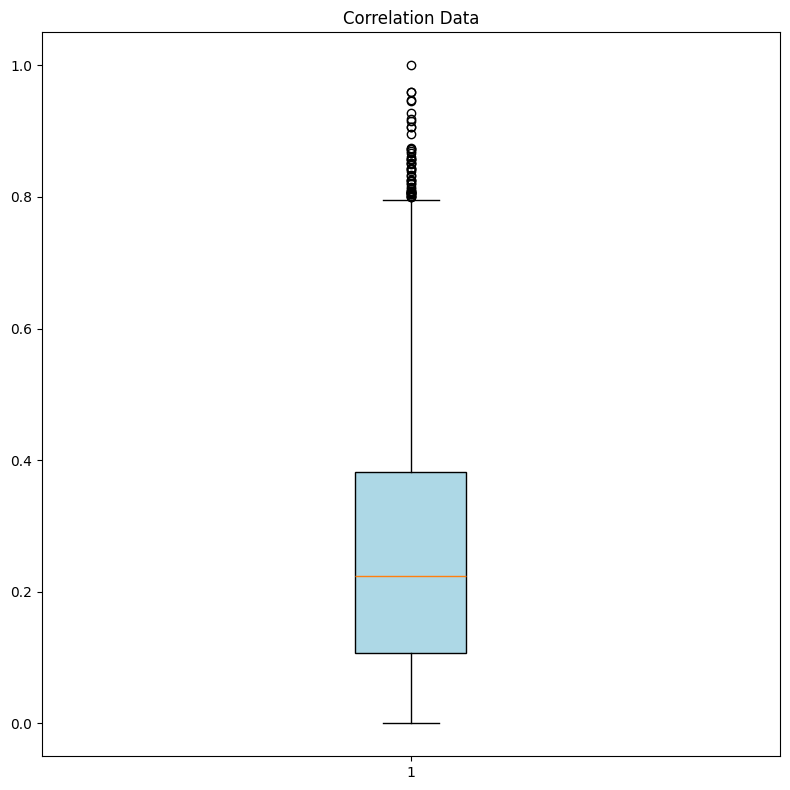

No of pair of features with correlation > 0.8 are: 48
No of pair of features with correlation > 0.5 are: 396


In [97]:
all_corr_count = np.square(len(num_cols))
corr = get_top_abs_correlations(df,all_corr_count)

print(corr.describe())

fig, axes = plt.subplots(figsize=(8, 8))

axes.boxplot(corr, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes.set_title("Correlation Data")

plt.tight_layout()
plt.show()

print("No of pair of features with correlation > 0.8 are: {}".format(sum(corr>0.8)))
print("No of pair of features with correlation > 0.5 are: {}".format(sum(corr>0.5)))

<p>Now based on the above analysis we can make following points :-</p>
<ul>
<li>Based on the<strong> top 30</strong> correlations data and <strong>scatter plots</strong>, we can conclude that there is strong evidence of high correlation among feature data.</li>
<li>The <strong>box-plot</strong> suggests that for the <strong>overall correlation data</strong>, there is roughly around 60% pair of features with very <strong>high correlation</strong> and thus indicating <strong>high multicollinearity.</strong></li>
<li>We will have to use <strong>PCA analysis</strong> to address this multicollinearity in data for efficient training of algorithms.</li>
</ul>

# Data Preprocessing

In [7]:
training_features = num_cols

print("Taget feature is : {}".format(target_class))
print("\n")

print("Features to drop are:-")
print(features_drop)
print("\n")

print("Categorical Columns are:-")
print(cat_cols)
print("\n")

print("Numerical Columns are:-")
print(num_cols)

Taget feature is : class


Features to drop are:-
Index(['MouseID'], dtype='object')


Categorical Columns are:-
Index(['Genotype', 'Treatment', 'Behavior', 'class'], dtype='object')


Numerical Columns are:-
Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N

In [8]:
class FeatureDrop(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features

    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        X = X.drop(self.features,axis=1)
        return X

drop_feat = FeatureDrop(features_drop.join(cat_cols,how="outer"))
mean_impute = SimpleImputer(strategy="mean")
std_scaler = StandardScaler()
onehot_enc = OneHotEncoder()
label_enc = LabelEncoder()

<h4> Train Test Split </h4>

In [9]:
df_train, df_test = train_test_split(df,stratify=df[target_class],test_size=0.2, random_state=42)

print("Length of df_train is : {}".format(len(df_train)))
print(df_train[target_class].value_counts())
print("\n")

print("Length of df_test is : {}".format(len(df_test)))
print(df_test[target_class].value_counts())
print("\n")

Length of df_train is : 864
class
c-CS-m    120
c-SC-m    120
c-CS-s    108
t-CS-m    108
t-SC-s    108
c-SC-s    108
t-SC-m    108
t-CS-s     84
Name: count, dtype: int64


Length of df_test is : 216
class
c-SC-m    30
c-CS-m    30
t-CS-m    27
c-CS-s    27
t-SC-s    27
t-SC-m    27
c-SC-s    27
t-CS-s    21
Name: count, dtype: int64




# Feature Transformation : PCA Analysis

In [10]:
X_train = df_train.copy()

pca_pipeline = make_pipeline(drop_feat,mean_impute,std_scaler)

In [11]:
display(pca_pipeline)

Pipeline(steps=[('featuredrop',
                 FeatureDrop(features=Index(['Behavior', 'Genotype', 'MouseID', 'Treatment', 'class'], dtype='object'))),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [12]:
X_train = pd.DataFrame(pca_pipeline.fit_transform(X_train),columns=num_cols)

In [13]:
display(X_train.head())

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0 -0.160622 -0.032783  1.160883  0.857507  1.015012  0.169864 -0.436829   
1  0.254858  0.061671 -0.388323  0.067397  0.331279 -0.682064 -1.093304   
2 -0.275535 -0.265800 -0.254840  0.395990  0.002138 -0.766223 -0.992751   
3 -0.002607 -0.241196  0.260611 -0.241747 -0.305901  0.362086  1.129971   
4 -0.772127 -0.850713 -0.725029 -0.485336 -0.897227  0.332941 -0.332404   

   pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N        BCL2_N  \
0  -0.235908 -0.681691  0.059173  ... -0.191296 -0.635073 -6.381511e-01   
1   0.027876 -1.518134 -0.303581  ...  0.293289 -0.528627 -1.219657e+00   
2   0.047418 -0.571056 -0.524457  ... -0.160545 -0.713643 -1.563641e+00   
3  -0.120714  0.755502 -0.578998  ...  0.257864  1.625283  1.235585e+00   
4  -0.198861  0.769828 -0.896723  ...  0.315144  0.049542 -1.171936e-15   

      pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
0  0.799779 -0.366561  1.605048   0.742898 -0.479696 -0.287883  1.480966  
1  0.281363  0.227897 -0.498561  -0.871823 -0.629182 -0.733043  0.463451  
2 -0.734039 -0.723249 -0.154690  -0.071112 -1.236806 -1.121554  0.804198  
3 -1.737271  0.446252  0.643312  -0.112480  0.817113  0.766027  1.667515  
4 -1.033646  0.000000 -1.927314   1.842200 -0.816953  0.393521 -0.009668  

[5 rows x 77 columns]

<h4>Choosing optimal number of PCA components</h4>

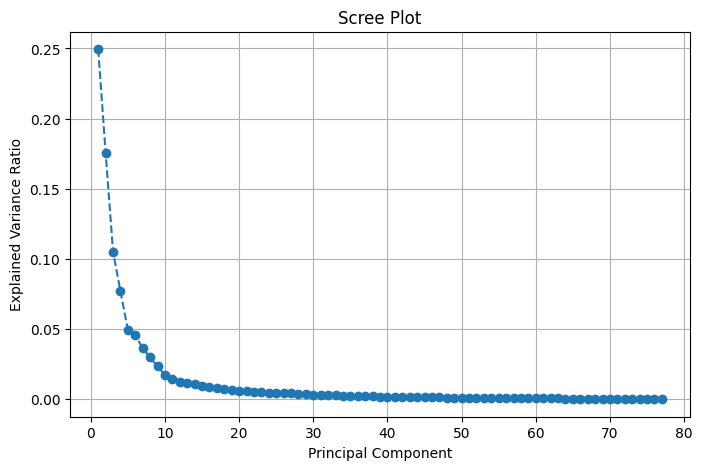

In [14]:
pcascree = PCA()

pcascree.fit(X_train)

# Get the explained variance ratio for each principal component
exp_var_ratio = pcascree.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(exp_var_ratio) + 1), exp_var_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

Like Scree plot suggests there must be at least 10 principal components, and so we can conclude that the maximum of the variance is being explained by the first 10 principal components.

# Model Training and Evaluation

<p>Based on above all the analysis, we will use 3 kind of models to train and evaluate our data. These models are :-</p>
<ol>
<li><strong>Gaussian Naive Bayes</strong></li>
<li><strong>KNN classification</strong></li>
<li><strong>SVM</strong></li>
</ol>
<p>Now the model training plan is outlined below :-</p>
<ol>
<li><strong>GNB = {"Feature Drop", "Data Imputation", "Training", "Evaluation" }</strong> -&gt; We will use only target_class feature column for this model.</li>
<li><strong>KNN = {"Feature Drop", "Data Imputation", "Standard scaling", "PCA transformation", "Training", "Parameter Tuning", "Evaluation" }</strong> -&gt; We will use only target_class feature column for this model.</li>
<li><strong>SVM ={"Feature Drop", "Data Imputation", "Standard scaling", "Training", "Parameter Tuning", "Evaluation" }</strong> -&gt; We will use 3 SVM models here for each one of target categorical features and compare the result with the final target feature.</li>
</ol>

In [29]:
def evaluation(y_pred,y_test):
    print("Accuracy = ", accuracy_score(y_test, y_pred))
    print("\n")

    print("The confusion matrix is as follows:-")
    print(confusion_matrix(y_test,y_pred))
    print("\n")

    print("The classification report is as follows:-")
    print(classification_report(y_test,y_pred))
    print("\n")

<h4> Gaussian Naive Bayes </h4>

In [16]:
X_train, y_train = df_train.copy(), df_train[target_class].copy()

X_test, y_test = df_test.copy(), df_test[target_class].copy()


gnb = GaussianNB()

gnb_pipeline = make_pipeline(drop_feat, mean_impute, gnb)

gnb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('featuredrop',
                 FeatureDrop(features=Index(['Behavior', 'Genotype', 'MouseID', 'Treatment', 'class'], dtype='object'))),
                ('simpleimputer', SimpleImputer()),
                ('gaussiannb', GaussianNB())])

In [17]:
y_pred = gnb_pipeline.predict(X_test)

print(evaluation(y_pred,y_test))

Accuracy =  0.7777777777777778


The confusion matrix is as follows:-
[[20  1  0  0  8  1  0  0]
 [ 4 16  0  0  7  0  0  0]
 [ 0  0 27  1  0  0  2  0]
 [ 0  0  0 20  0  0  2  5]
 [ 4  2  0  0 21  0  0  0]
 [ 3  2  0  0  2 14  0  0]
 [ 0  0  2  2  0  0 23  0]
 [ 0  0  0  0  0  0  0 27]]


The
              precision    recall  f1-score   support

      c-CS-m       0.65      0.67      0.66        30
      c-CS-s       0.76      0.59      0.67        27
      c-SC-m       0.93      0.90      0.92        30
      c-SC-s       0.87      0.74      0.80        27
      t-CS-m       0.55      0.78      0.65        27
      t-CS-s       0.93      0.67      0.78        21
      t-SC-m       0.85      0.85      0.85        27
      t-SC-s       0.84      1.00      0.92        27

    accuracy                           0.78       216
   macro avg       0.80      0.77      0.78       216
weighted avg       0.79      0.78      0.78       216



None


<h4> K-Nearest Neighbour</h4>

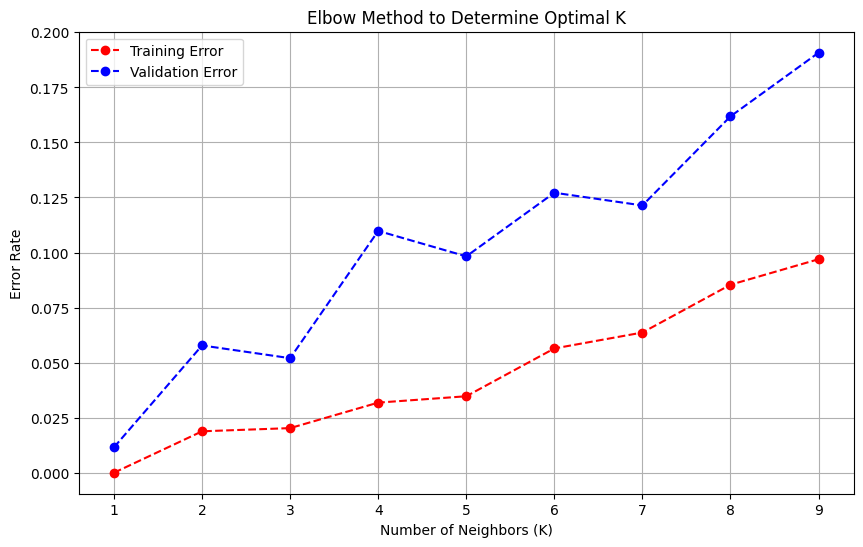

In [18]:
knn_train, knn_val = train_test_split(df_train,test_size=0.2, random_state=42)

X_train, y_train = knn_train.copy(), knn_train[target_class].copy()

X_val, y_val = knn_val.copy(), knn_val[target_class].copy()

pca = PCA(n_components = 10)

knn_pipeline = make_pipeline(drop_feat,mean_impute,std_scaler,pca)

X_train = knn_pipeline.fit_transform(X_train)
X_val = knn_pipeline.transform(X_val)

k_values = range(1, 10)
training_errors = []
testing_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_val = knn.predict(X_val)
    training_errors.append(1 - accuracy_score(y_train, y_pred_train))
    testing_errors.append(1 - accuracy_score(y_val, y_pred_val))

plt.figure(figsize=(10, 6))
plt.plot(k_values, training_errors, marker='o', linestyle='--', color='red', label='Training Error')
plt.plot(k_values, testing_errors, marker='o', linestyle='--', color='blue', label='Validation Error')
plt.xticks(k_values)
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.legend()
plt.grid()
plt.show()

https://stackoverflow.com/questions/68284264/does-the-pipeline-object-in-sklearn-transform-the-test-data-when-using-the-pred

Pipeline(steps=[('featuredrop',
                 FeatureDrop(features=Index(['Behavior', 'Genotype', 'MouseID', 'Treatment', 'class'], dtype='object'))),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

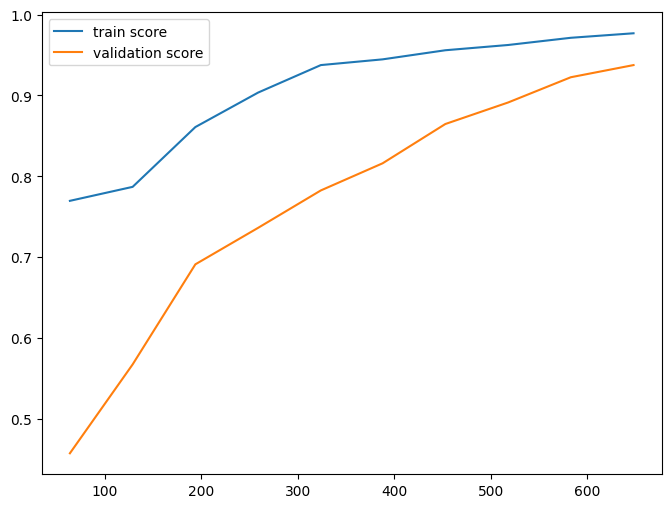

In [19]:
X_train, y_train = df_train.copy(), df_train[target_class].copy()

X_test, y_test = df_test.copy(), df_test[target_class].copy()

pca = PCA(n_components = 10)
knn = KNeighborsClassifier(n_neighbors=3)

knn_pipeline = make_pipeline(drop_feat,mean_impute,std_scaler,pca,knn)

N, train_score, val_score = learning_curve(knn_pipeline, X_train, y_train, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1,1,10))

plt.figure(figsize=(8,6))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

knn_pipeline.fit(X_train, y_train)

In [20]:
y_pred = knn_pipeline.predict(X_test)

print(evaluation(y_pred,y_test))

Accuracy =  0.9305555555555556


The confusion matrix is as follows:-
[[27  0  0  0  0  2  0  1]
 [ 2 23  0  0  0  2  0  0]
 [ 0  0 28  1  0  0  1  0]
 [ 0  0  0 27  0  0  0  0]
 [ 0  2  0  0 25  0  0  0]
 [ 0  0  0  0  0 21  0  0]
 [ 0  0  2  1  0  0 24  0]
 [ 0  0  0  0  1  0  0 26]]


The
              precision    recall  f1-score   support

      c-CS-m       0.93      0.90      0.92        30
      c-CS-s       0.92      0.85      0.88        27
      c-SC-m       0.93      0.93      0.93        30
      c-SC-s       0.93      1.00      0.96        27
      t-CS-m       0.96      0.93      0.94        27
      t-CS-s       0.84      1.00      0.91        21
      t-SC-m       0.96      0.89      0.92        27
      t-SC-s       0.96      0.96      0.96        27

    accuracy                           0.93       216
   macro avg       0.93      0.93      0.93       216
weighted avg       0.93      0.93      0.93       216



None


<h4> SVM </h4>

In [21]:
X_train, y_train = df_train.copy(), df_train[cat_cols[:-1]].copy()

y_train_0 = label_enc.fit_transform(y_train[cat_cols[0]])
y_train_1 = label_enc.fit_transform(y_train[cat_cols[1]])
y_train_2 = label_enc.fit_transform(y_train[cat_cols[2]])

hyper_parameters = {"kernel":("rbf","linear","poly"),"C":[.001,.01,1,10],"degree":[2,3,5,8]}

svm_0 = SVC(probability=True)
svm_1 = SVC(probability=True)
svm_2 = SVC(probability=True)

svm_pipeline = make_pipeline(drop_feat,mean_impute,std_scaler)

X_train = svm_pipeline.fit_transform(X_train)

scoring = ['balanced_accuracy','f1','roc_auc']
for metric in scoring:
  clf_0 = GridSearchCV(estimator = svm_0,param_grid=hyper_parameters,scoring = metric)
  clf_1 = GridSearchCV(estimator = svm_1,param_grid=hyper_parameters,scoring = metric)
  clf_2 = GridSearchCV(estimator = svm_2,param_grid=hyper_parameters,scoring = metric)
  
  clf_0.fit(X_train,y_train_0)
  clf_1.fit(X_train,y_train_1)
  clf_2.fit(X_train,y_train_2)
  
  print("Best param for {} svm are:-".format(cat_cols[0]))
  print(clf_0.best_params_)
  print("\n")
  print("Best {} : {}".format(metric,clf_0.best_score_))
  print("\n")
  print("Best param for {} svm are:-".format(cat_cols[1]))
  print(clf_1.best_params_)
  print("\n")
  print("Best {} : {}".format(metric,clf_1.best_score_))
  print("\n")
  print("Best param for {} svm are:-".format(cat_cols[2]))
  print(clf_2.best_params_)
  print("\n")
  print("Best {} : {}".format(metric,clf_2.best_score_))
  print("\n")
  print("\n")

Best param for Genotype svm are:-
{'C': 10, 'degree': 2, 'kernel': 'rbf'}


Best balanced_accuracy : 0.997681586705977


Best param for Treatment svm are:-
{'C': 1, 'degree': 2, 'kernel': 'rbf'}


Best balanced_accuracy : 0.9967152412804587


Best param for Behavior svm are:-
{'C': 0.01, 'degree': 2, 'kernel': 'linear'}


Best balanced_accuracy : 1.0




Best param for Genotype svm are:-
{'C': 10, 'degree': 2, 'kernel': 'rbf'}


Best f1 : 0.9975608849228481


Best param for Treatment svm are:-
{'C': 1, 'degree': 2, 'kernel': 'rbf'}


Best f1 : 0.9963338910578174


Best param for Behavior svm are:-
{'C': 0.01, 'degree': 2, 'kernel': 'linear'}


Best f1 : 1.0




Best param for Genotype svm are:-
{'C': 10, 'degree': 2, 'kernel': 'rbf'}


Best roc_auc : 1.0


Best param for Treatment svm are:-
{'C': 10, 'degree': 2, 'kernel': 'rbf'}


Best roc_auc : 1.0


Best param for Behavior svm are:-
{'C': 0.01, 'degree': 2, 'kernel': 'linear'}


Best roc_auc : 1.0






Pipeline(steps=[('featuredrop',
                 FeatureDrop(features=Index(['Behavior', 'Genotype', 'MouseID', 'Treatment', 'class'], dtype='object'))),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, degree=2, kernel='linear', probability=True))])

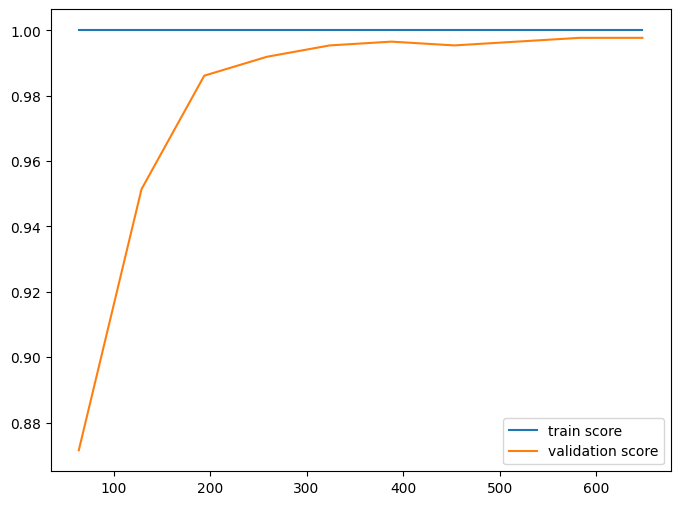

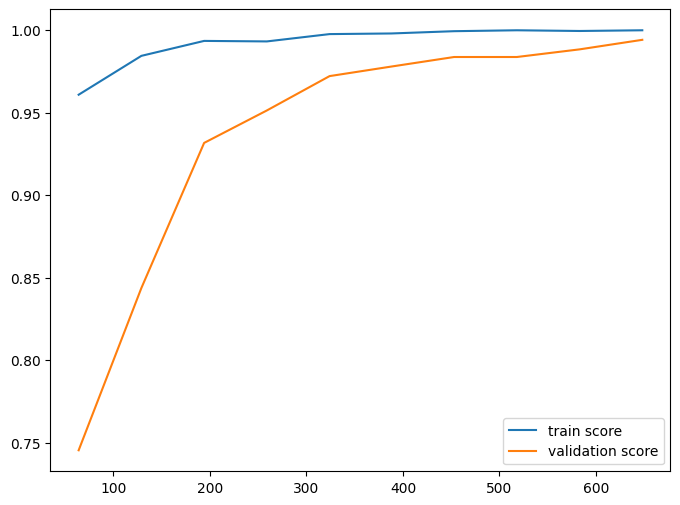

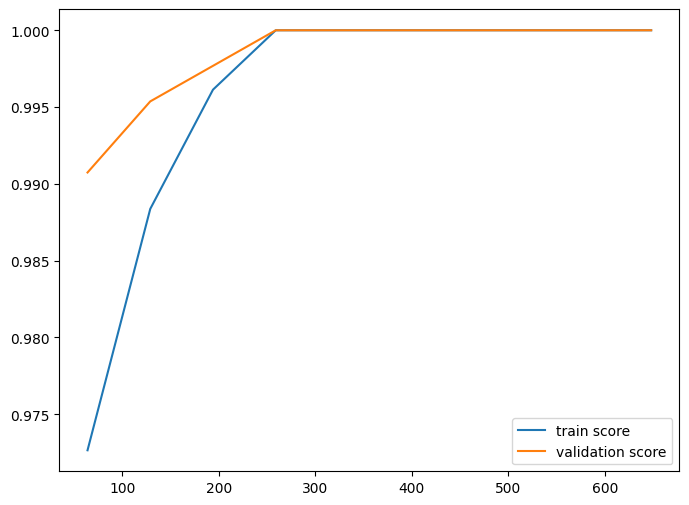

In [26]:
X_train, y_train = df_train.copy(), df_train[cat_cols[:-1]].copy()

X_test, y_test = df_test.copy(), df_test[cat_cols[:-1]].copy()

y_train_0 = y_train[cat_cols[0]]
y_train_1 = y_train[cat_cols[1]]
y_train_2 = y_train[cat_cols[2]]

y_test_0 = y_test[cat_cols[0]]
y_test_1 = y_test[cat_cols[1]]
y_test_2 = y_test[cat_cols[2]]

svm_0 = SVC(C=10,degree=2,kernel="rbf",probability=True)
svm_1 = SVC(C=1,degree=2,kernel="rbf",probability=True)
svm_2 = SVC(C=0.01,degree=2,kernel="linear",probability=True)

svm0_pipeline = make_pipeline(drop_feat,mean_impute,std_scaler,svm_0)
svm1_pipeline = make_pipeline(drop_feat,mean_impute,std_scaler,svm_1)
svm2_pipeline = make_pipeline(drop_feat,mean_impute,std_scaler,svm_2)

N, train_score, val_score = learning_curve(svm0_pipeline, X_train, y_train_0, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1,1,10))

plt.figure(figsize=(8,6))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

N, train_score, val_score = learning_curve(svm1_pipeline, X_train, y_train_1, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1,1,10))

plt.figure(figsize=(8,6))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

N, train_score, val_score = learning_curve(svm2_pipeline, X_train, y_train_2, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1,1,10))

plt.figure(figsize=(8,6))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

svm0_pipeline.fit(X_train, y_train_0)
svm1_pipeline.fit(X_train, y_train_1)
svm2_pipeline.fit(X_train, y_train_2)

In [27]:
y_pred_0 = svm0_pipeline.predict(X_test)
y_pred_1 = svm1_pipeline.predict(X_test)
y_pred_2 = svm2_pipeline.predict(X_test)

print(evaluation(y_pred_0,y_test_0))
print("\n")
print(evaluation(y_pred_1,y_test_1))
print("\n")
print(evaluation(y_pred_2,y_test_2))

Accuracy =  0.9953703703703703


The confusion matrix is as follows:-
[[113   1]
 [  0 102]]


The
              precision    recall  f1-score   support

     Control       1.00      0.99      1.00       114
      Ts65Dn       0.99      1.00      1.00       102

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



None


Accuracy =  0.9953703703703703


The confusion matrix is as follows:-
[[113   1]
 [  0 102]]


The
              precision    recall  f1-score   support

   Memantine       1.00      0.99      1.00       114
      Saline       0.99      1.00      1.00       102

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



None


Accuracy =  1.0


The confusion matrix is as follows:-
[[105   0]
 [  0 111]]


The
              precision    recall  f1-score   